<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [1]:
import os

data_dir = '/Users/agataczap/Documents/Python/TF_2_Notebooks_and_Data/cell_images'

os.listdir(data_dir)

#should see ['test', 'train']


['.DS_Store', 'test', 'train']

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

**TRIPLE CHECK WHERE YOUR FILES ARE DOWNLOADED AND UNZIPPED. PLEASE REVIEW VIDEO BEFORE POSTING TO QA FORUMS.**

In [3]:
#my_data_dir = 'C:\\Users\\Marcial\\Pierian-Data-Courses\\cell_images'

In [5]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
#os.listdir(my_data_dir) 

['test', 'train']

Should see test and train folder.
Explore this further, copy and paste several imports.
from matplotlib.image import im read - read imported images directly from your folder

Concatenate directory path with the folder names to quickly generate new paths for each folder.

In [3]:
test_path = data_dir+ '/test/'
train_path = data_dir+'/train/'

List files inside test and train folders, 2 folders - parasitized and uninfected cell images.
27K images in total, available from NIH, paper link is in this notebook.
Images of cells infected with malaria or not.
Buil model based on image of a cell, instead of manually look, let algorithm learn patterns.

In [4]:
os.listdir(test_path)

['.DS_Store', 'parasitized', 'uninfected']

In [5]:
os.listdir(train_path)

['.DS_Store', 'parasitized', 'uninfected']

Add parasite line, get parasite image, see list of them all, thousands of images here.
Grab first one from the list.
PNG file, tell where image file is.
Save directory path to a variable, add name of the file image, entire file path.
Then imread(para_cell)

In [7]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [8]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_img= imread(para_cell)

Transforms png file to an array.
148, 142, 3 - it is a colour imnage
plt.show - see what it has, dark infected area

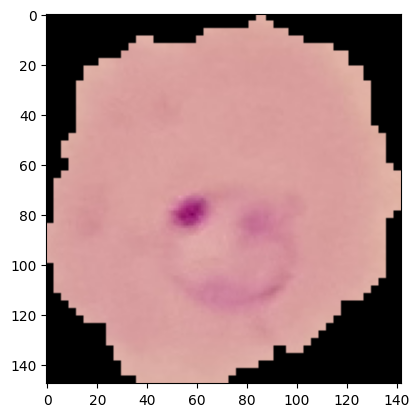

In [12]:
plt.imshow(para_img)

In [53]:
para_img.shape

(148, 142, 3)

See how uninfected cell looks like. 
Grab file path and file name for the first image.
Difference is quite obvious, uninfected is pink, no dark stain.

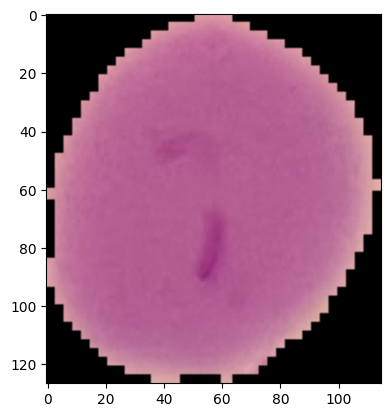

In [13]:
unifected_cell_path = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected/')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are.**

Same number of infected and uninfected cell images. 


In [15]:
len(os.listdir(train_path+'/parasitized/'))

12480

In [14]:
len(os.listdir(train_path+'/uninfected/'))

12480

In [18]:
len(os.listdir(train_path+'/parasitized/'))
len(os.listdir(train_path+'/uninfected/'))

12480

**Let's find out the average dimensions of these images.**

Real life images often have different dimensions.

In [16]:
unifected_cell.shape

(127, 115, 3)

In [17]:
para_img.shape

(148, 142, 3)

Create 2 lists of dimensions, grab file paths for each class.
Create loop, read file as an array, iterate through each file, pass full length.
Then you will check image shape, tuple of 3 dimensions
Add dimensions to the lists, 13K files, check shape and save 1st and 2nd dimension.

for image_filename in os.listdir(test_path + '/uninfected/'):
    img = imread(test_path + '/uninfected/' + image_filename)
    d1,d2, colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [36]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    
    img = imread(test_path+'/uninfected/'  +image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
dim1

All different, real image files, same 4 dimensions, create histogram of both dimensions.
sns.jointplot(dim1, dim2)
Large image of 200x200 pixels.
The actual CNN cannot be trained on images with different dimensions, but you will have to resize them to same dimensions.
All look like 30x30, check mean
np.mean(dim1)
np.mean(dim2)
Will tell you final image shape 
image_shape = (130,130,3)

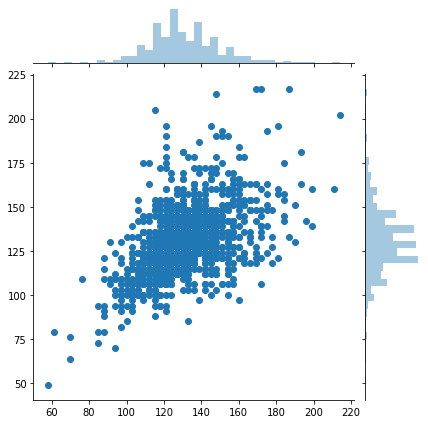

In [38]:
sns.jointplot(dim1,dim2)

In [40]:
np.mean(dim1)

130.92538461538462

In [41]:
np.mean(dim2)

130.75

In [42]:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

How to use image data generator to manipulate and make all images same size.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Then create a call for it image_gen = ImageDataGenerator()

Less than 30K images, expand number of images without having to collect data.
Take current images and randomly rotate them.

ImageDataGenerator:

rotation_range = 20, rotate image by 20 degrees, can be more
width_shift_range = 0.1 0-0.1, shift width of the image
height_shift_range = 0.1 0-0.1, shift height range

Good values depend on what kind of images you deal with, blobs in your dataset, circular, can be stretched or squished, high values here
Facial data, cannot squeeze or rotate images so much, as will make them unrecognisable.

Rescale the image by normalising it
Image read, max values, already standard and normal, 0-1 or if not then set rescale=255 as it would have been 0-255
uninfected_cell.max() and para_cell.max()
shear_range - cut away part of image, again 0.1
zoom_range - zoom in on image, 0.1
horizontal_flip or vertical_flip - flip image, True or false
fill_mode = 'nearest', if image is stretched out, how you will fill that image in.

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [44]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Show image after before and after transforming the image.
Look at parasitised cell.
para_img = imread(para_cell)

Model will not be fed that image, see the random transofrmation.
plt.show(image_gen.random_transform(para_img))
Stretched out, filled in parts, and rotated as well.
Depending on what type of images you will look at, play around with the transformation values.
Every time you will run the line, will transform randomly the image, happens to every image, expand your dataset, even double artificially.
Useful for small image datasets.

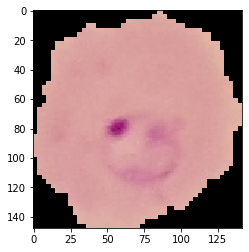

In [60]:
plt.imshow(para_img)

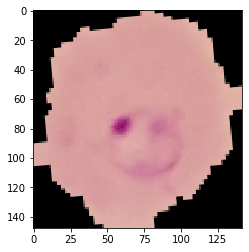

In [63]:
plt.imshow(image_gen.random_transform(para_img))

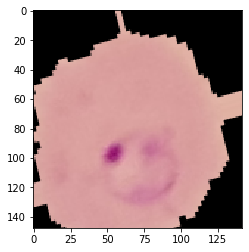

In [64]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

Set up directory to keep feeding images from the training folder.
image_gen.flow_from_directory(train_path)
This many images belonging to 2 classes, organised in very specific way, must organise images in subdirectories, otherwise method won't work.
Overall image data folder, for every class you will need folder, representations of class 0, with 0 in the name.
This allows flow from directory to your CNN network.
Separate test and training data.

Set up same flow from test path.

In [65]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [66]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

Creating the model, several different layers, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

MaxPool vs MaxPooling  are the same, aliases, multiple names for same function call.

So many versions, multiple names for same thing.

Large network, add dropout to prevent overfitting.

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()

model.addConv2D(filters = 32, kernel_size = (3,3) input_shape = image_shape defined by avg image size. can be played around with, activation = 'relu')
model.add(MaxPool2D(pool_size = (2,2)) so default

Link below, explain on different rules on number of neurons and layers in CNN.

Add flatten layer, always empty
model.add(Flatten())

add Dense

model.add(Dense(128, activation = 'relu')) depending on what people do and datassets they use, often add, activation after Dense layer
model.add(Dropout(0.5)) - turn off 50% of neurons


model.add(Dense(1, activation = 'sigmoid))


Then compile model with:
model.compule(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
Binary crossentropy as you have 2 categories.

In [68]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Check out model summary, tons of parameters, model will take a long time to train.
Choose the right number of epochs and early stopping, based off monitoring validation loss, patience of 2 epochs.

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

## Early Stopping

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [74]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

choose batch size, train 16 images at a time, the larger the dataset, feed in larger batches, to speed up training.
Create 2 generators, same just different source of the data.

train_image_gen
test_image_gen

train_image_gen = image_gen.flow_from_directory(train_path,target_size = width,height,=image_shape[:2] - only first 2 dimensions,
                                color_mode is correct = 'rgb' - colour images, alpha channel is transparency, so pass 'rgba' or greyscale,
                                batch_size = batch_size, class_mode = 'binary')
Do the dsame for test_image_gen, just change path to test_path and shuffle, shuffle data, especially during training, but for this we want to
set it to False, so that labels don't get mixed up.

In [77]:
batch_size = 16

In [78]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [113]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


0 assigned to parasitized and 1 to uninfected


In [82]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [83]:
import warnings
warnings.filterwarnings('ignore')

Results are equal to model.fit_generator, pass training image generator, large number of epochs, validation=test_image generator
and callbacks as early stop.

Long time to train, interrupt, kernel, have malaria_detector, load
from tensorflow.keras.models import load_model
model = load_model('malaran_detector.h5)
confirm model works with model.summary()
Will work but has no history, fully trained, can save model history, how to save with history as pickle file.
Can see history of the training here.
Can still do model.evaulate_generator(test_image_gen)
depending on shuffling and random trasnformations may look a bit different, loss and accuracy , 85%-95% compared to base of 50%

In [84]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.4588 - accuracy: 0.8060 - val_loss: 0.3180 - val_accuracy: 0.9112
Epoch 2/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.2411 - accuracy: 0.9300 - val_loss: 0.1947 - val_accuracy: 0.9412
Epoch 3/20
1560/1560 [==============================] - 95s 61ms/step - loss: 0.2015 - accuracy: 0.9372 - val_loss: 0.1841 - val_accuracy: 0.9423
Epoch 4/20
1560/1560 [==============================] - 98s 63ms/step - loss: 0.1670 - accuracy: 0.9485 - val_loss: 0.1693 - val_accuracy: 0.9431
Epoch 5/20
1560/1560 [==============================] - 98s 63ms/step - loss: 0.1606 - accuracy: 0.9500 - val_loss: 0.1882 - val_accuracy: 0.9388
Epoch 6/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.1583 - accuracy: 0.9514 - val_loss: 0.1464 - val_accuracy: 0.9542
Epoch 7/20
1560/1560 [==============================] - 97s 62ms/step - loss: 0.1559 - accuracy: 0.9497 - val_loss: 0.1595 -

In [88]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [ ]:
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

# Evaluating the Model

Back in the notebook, make predictions, takes a bit longer than regular prediction.
Does not return back straight classes, but probabilities, 90% sure if an image belongs to a class if value is 1.

In [ ]:
pred = model.predict_generator(test_image_gen)

In [89]:
losses = pd.DataFrame(model.history.history)

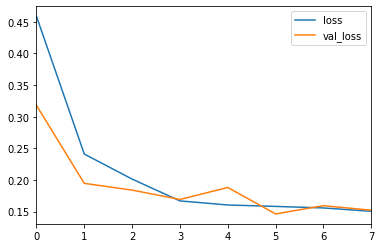

In [90]:
losses[['loss','val_loss']].plot()

In [91]:
model.metrics_names

['loss', 'accuracy']

In [114]:
model.evaluate_generator(test_image_gen)

[0.14881458843521134, 0.94884616]

In [97]:
from tensorflow.keras.preprocessing import image

In [115]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [116]:
pred_probabilities

array([[2.2703409e-04],
       [2.1749735e-04],
       [5.4228306e-04],
       ...,
       [9.7448182e-01],
       [9.7615612e-01],
       [9.6059412e-01]], dtype=float32)

In [117]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

Get true and false statements here, any predictions greater than 50% of certainty, 0s and 1s, in case of numpy.
Pass predictions into confusion matrix and classification report.
Pred is just probability values so cannot be used.
lem(pred) = 2600 = entire dataset

In [118]:
predictions = pred_probabilities > 0.5

In [119]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

To get classes use test_image_gen.classes from our true classes vs predictions.
Get 87% accuracy >>> 50% accuracy from baseline, pred probability, implement in real life, >50% sure if predictions is uninfected, label as uninfected.
1 is uninfected, and if 0 then infected.
Serve as a model that assists a doctor, make your own precision and recall trade, alert if only >80% sure.
Can be adjusted, important aspect in real life, type 1 errror or type 2, which is more important.
One of the most important code lines in entire project below predictions = pred > 0.5

In [121]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



Confusion matrix tells you how many images are misclassified, so only 17.

In [122]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1220,   80],
       [  46, 1254]], dtype=int64)

# Predicting on an Image

Predict from one image.
para_cell is a single image.
from tensorflow.keras.preprocessing import image
load image functionality from tensorflow
image.load_image(para_cell) loads image
returns specialised image file PIL, can provide path and target size, reshape
image.load_image(para_cell, target_size = image_size) specified before
Email png file, train or load up model, test and predict, pass to the model.

In [124]:
# Your file path will be different!
para_cell

'C:\\Users\\Marcial\\Pierian-Data-Courses\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [132]:
my_image = image.load_img(para_cell,target_size=image_shape)

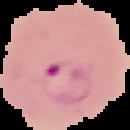

In [137]:
my_image

In [138]:
type(my_image)

PIL.Image.Image

Convert to an array for passing to the model with image.img_to_array(my_image)


In [139]:
my_image_arr = image.img_to_array(my_image)

In [142]:
type(my_image_arr)

numpy.ndarray

Check shape to resize, along 0 dimension, np.expand_dims(my_img_arr, axis=0) - reshapes, one image of 30x30x3, batch of one image as model expects batches, even for 1 image.

In [143]:
my_image_arr.shape

(130, 130, 3)

In [144]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [145]:
my_image_arr.shape

(1, 130, 130, 3)

Run model.predict on image array reshaped.
Then train_image_gen.class_indices, shows as infected.

In [146]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [147]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [148]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

# Great Job!